In [180]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from numpy import random
import time

In [181]:
def shuffled(L, Δ):
    
    A=[]
    original = np.linspace(0,L-1,L)
    
    for i in original:
        for j in original:
        
            x = i+random.uniform(low= -Δ/2, high=Δ/2)   
            y = j+random.uniform(low= -Δ/2, high=Δ/2)       
            A.append([x,y])
            
    return A

In [217]:
def create(L) :
    return [[x_0,x_1] for x_0 in range(2*L) for x_1 in range(2*L)]

def matrix(L, Δ):
    
    M = shuffled(L, Δ)
    
    array = {}
    
    shuffled_X = [sites[0] for sites in M]
    shuffled_Y = [sites[1] for sites in M]
    
    for i in range(0,L*L): 
        array[int(i/L),i%L] = [shuffled_X[i],shuffled_Y[i]]
    return array

def distance(x_0,matrix,L):
    
    arr_dist =[]
    
    coord = np.linspace(int(-1.5*L),int(1.5*L), 3*L+1)
    
    for i in coord:
        for j in coord:
    
             delta_x = abs(x_0[0]-mat[i%L, j%L][0])
             delta_y = abs(x_0[1]-mat[i%L, j%L][1])

             dist = np.power(np.power(delta_x,2) + np.power(delta_y,2),1/2)
            
             arr_dist.append(dist)
          #  arr_dist.append([i,j])
            
    return arr_dist

def radii(L, steps):
    radius = np.linspace(0.01,L/2,num=steps)
    return radius

def x_0(L):                                                                              
    x = random.uniform(int(L/2),int(3*L/2))
    y = random.uniform(int(L/2),int(3*L/2))
    center = [x,y]
    return center

def count_s(x_0,mat,radius,L): #count how many points are at a distance <= r from x
    dist = distance(x_0,mat,L)
    dist.sort()
    d = np.array(dist)
    counts = []
    for R in radius:
        count_R = np.count_nonzero(d <= R)
        counts.append(count_R)
    #print(counts)
    return counts

def vec_x0(L,n):
    v = [x_0(L) for i in range(n)]
    return v

def arr_counts(L,n,radius,mat):
    v = vec_x0(L,n)
    arr = [count_s(x0,mat,radius,L) for x0 in v]
    return arr

def variance(L,n,radius,mat):
    arr = arr_counts(L,n,radius,mat)
    m = np.array(arr)
    arr_var = []
    for i in range(len(radius)):
        mom = np.power(m[:,i],2)
        var = (np.average(mom)-np.power(np.average(m[:,i]),2))/radius[i]**2
        arr_var.append(var)
    return arr_var

In [232]:
center= [0,0]

mat = matrix(10,0)
radius = radii(10,200)
var = count_s(center,mat,radius,10)
dis = distance(center,mat,10)

In [233]:
dis

[7.0710678118654755,
 7.810249675906654,
 8.602325267042627,
 9.433981132056603,
 10.295630140987,
 5.0,
 5.0990195135927845,
 5.385164807134504,
 5.830951894845301,
 6.4031242374328485,
 7.0710678118654755,
 7.810249675906654,
 8.602325267042627,
 9.433981132056603,
 10.295630140987,
 5.0,
 5.0990195135927845,
 5.385164807134504,
 5.830951894845301,
 6.4031242374328485,
 7.0710678118654755,
 7.810249675906654,
 8.602325267042627,
 9.433981132056603,
 10.295630140987,
 5.0,
 5.0990195135927845,
 5.385164807134504,
 5.830951894845301,
 6.4031242374328485,
 7.0710678118654755,
 7.810249675906654,
 8.48528137423857,
 9.219544457292887,
 10.0,
 10.816653826391969,
 6.0,
 6.082762530298219,
 6.324555320336759,
 6.708203932499369,
 7.211102550927978,
 7.810249675906654,
 8.48528137423857,
 9.219544457292887,
 10.0,
 10.816653826391969,
 6.0,
 6.082762530298219,
 6.324555320336759,
 6.708203932499369,
 7.211102550927978,
 7.810249675906654,
 8.48528137423857,
 9.219544457292887,
 10.0,
 10.81

KeyboardInterrupt: 

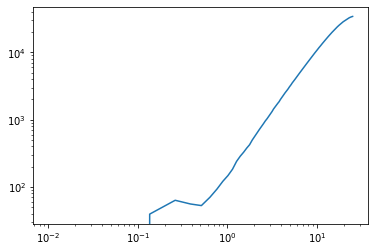

In [222]:
L=10
Δ=0

start = time.time()
size = [50,100]
arrays_var = []
for i in range(len(size)):
    mat = matrix(size[i],Δ)
    radius = radii(size[i],200)
    arrays_var.append(variance(size[i],1000,radius,mat))
    plt.plot(radius, arrays_var[i], label = 'L =' + str(size[i]))
    plt.xscale('log')
    plt.yscale('log')
total = time.time()-start
print(total)
plt.legend()
plt.show()